In [6]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt


from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
%matplotlib inline 


from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.simplefilter("ignore")

df=pd.read_csv('vax_tweets_sentiment.csv')

In [7]:
df.sort_values(by='date')

Unnamed: 0  \
20627                                         ~~Socrates   
294                                                  294   
34                                                    34   
35                                                    35   
36                                                    36   
...                                                  ...   
20626                                              20626   
27713                                             doses    
27714                   reached 65 nations and recently    
27715                                             doses    
27716  reached 65 nations and recently… https://t.co/...   

                                                    id  \
20627                              2010-04-29 09:51:17   
294                                1337884374927368201   
34                                 1337742528108519424   
35                                 1337739607857917954   
36                                 1337735595704115200   
...                                                ...   
20626                              1367112626086453249   
27713                                              NaN   
27714  ['India', 'coronavirus', 'vaccines', 'COVAXIN']   
27715                                              NaN   
27716                                              NaN   

                         user_name             user_location  \
20627                           80                       241   
294                       Nacindex                       NaN   
34                     Rajat Kotra           London, England   
35     Shahjhan Malik | #WearAMask  Nottinghamshire, England   
36                      John Berry                       NaN   
...                            ...                       ...   
20626             Lalatendu Mishra                     India   
27713                          NaN                       NaN   
27714          Twitter for Android                         5   
27715                          NaN                       NaN   
27716                          NaN                       NaN   

                                        user_description         user_created  \
20627                                               6405                False   
294    Tweet and RT all things #OpenFinance #bitcoin ...  2019-03-16 15:14:32   
34     Ever-curious polymath,#global leader#startups#...  2009-12-03 12:03:28   
35     Solicitor.Dual Qualified.Single Parent Of 2 Am...  2017-06-22 06:22:55   
36     English (not British or European) beer swillin...  2020-10-13 15:21:27   
...                                                  ...                  ...   
20626  ^^The only true wisdom is in knowing you know ...                  NaN   
27713                                                NaN                  NaN   
27714                                                  4                False   
27715                                                NaN                  NaN   
27716                                                NaN                  NaN   

      user_followers                                       user_friends  \
20627     2021-03-03  Interim clinical efficacy is 81% for  's \n\nS...   
294              331                                                431   
34               754                                                917   
35             41708                                               2868   
36                 2                                                  0   
...              ...                                                ...   
20626            NaN                                                NaN   
27713            NaN                                                NaN   
27714        neutral  #India becomes the global hub of #coronavirus ...   
27715            NaN                                                NaN   
27716            NaN                                         

## Sentiment analysis

In [8]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

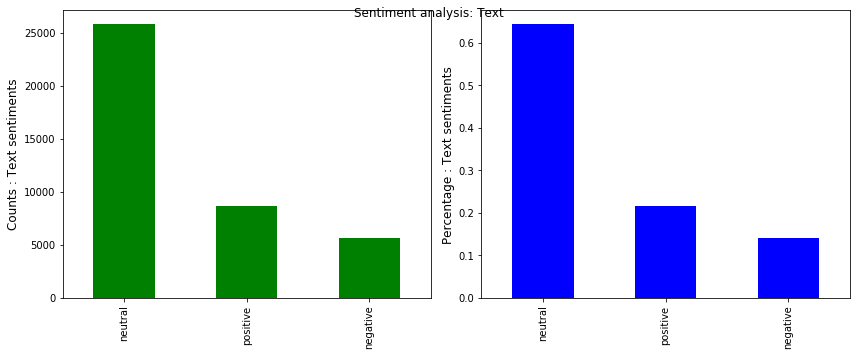

In [9]:
# used  AWD_LSTM model from fast ai and used transfer learning

plot_sentiment(df, 'sentiment', 'Text')

In [10]:
final_df=df.drop(columns=['user_description','user_created','user_followers','user_friends','user_favourites','user_verified','source'])

In [11]:

final_df[['text','sentiment']].head(20)

text sentiment
0   Same folks said daikon paste could treat a cyt...  negative
1   While the world has been on the wrong side of ...  positive
2         Russian vaccine is created to last 2-4 y...   neutral
3   Facts are immutable, Senator, even when you're...   neutral
4      Explain to me again why we need a vaccine        neutral
5   Does anyone have any useful advice/guidance fo...   neutral
6   it is a bit sad to claim the fame for success ...  negative
7   There have not been many bright days in 2020 b...  positive
8              Covid vaccine; You getting it?\n\n       neutral
9    \n\nStates will start getting  Monday,  says ...   neutral
10  while deaths are closing in on the 300,000 mar...   neutral
11                             Best wishes to the US   positive
12  The agency also released new information for h...   neutral
13  For all the women and healthcare providers who...   neutral
14  "Expect 145 sites across all the states to rec...   neutral
15  Trump announces  rollout 'in less than 24 hour...   neutral
16               UPDATED:  &amp;   - Part Two\n\n       neutral
17  Coronavirus: Iran reports 8,201 new cases, 221...   neutral
18  . will rake in billions from its expensive  bu...  negative
19  The trump administration failed to deliver on ...  negative

## WordCloud 

In [12]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [13]:
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U","vaccine",'COVID19',"got","will",'covid','vacccines','dose'])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

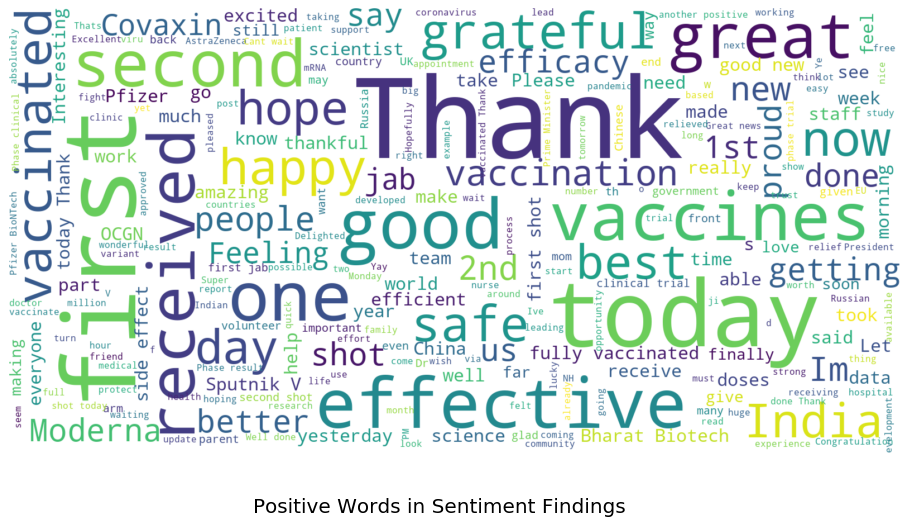

In [14]:
show_wordcloud(df.loc[df['sentiment']=='positive', 'text'], title = 'Positive Words in Sentiment Findings')

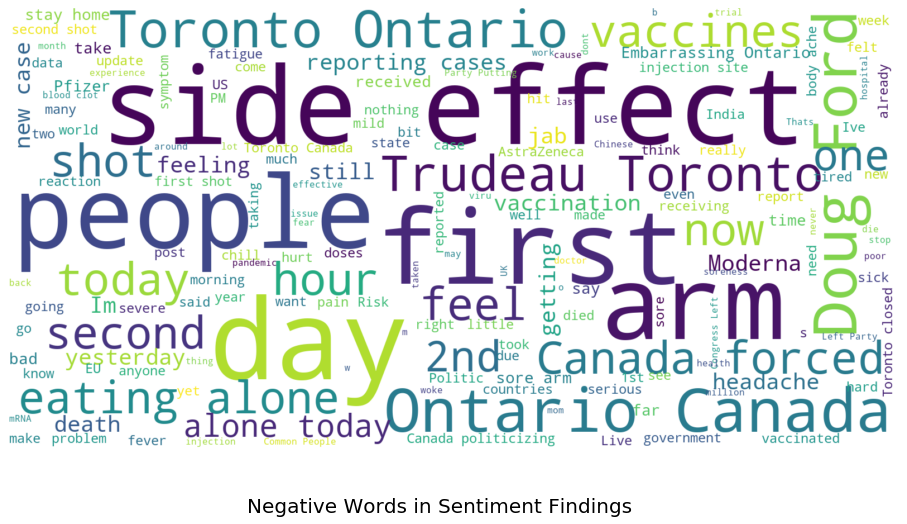

In [15]:
show_wordcloud(df.loc[df['sentiment']=='negative', 'text'], title = 'Negative Words in Sentiment Findings')

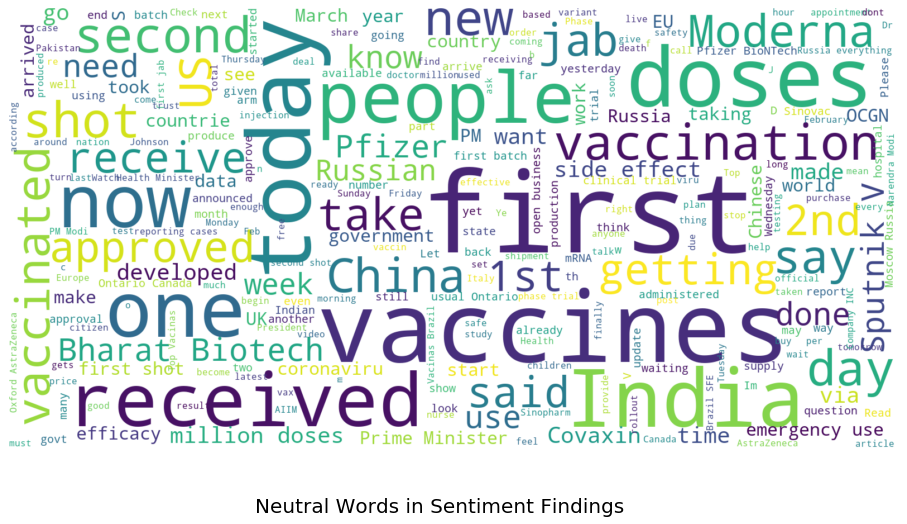

In [16]:
show_wordcloud(df.loc[df['sentiment']=='neutral', 'text'], title = 'Neutral Words in Sentiment Findings')

## Covaxin Plot 

In [17]:
import plotly.graph_objs as go 
import plotly.offline as pyo


all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']

# Function to filter the data to a single vaccine and plot the timeline
# Note: a lot of the tweets seem to contain hashtags for multiple vaccines even though they are specifically referring to one vaccine - not very helpful!
def filtered_timeline(df, vax, title):
    df = df.dropna()
    df_filt = pd.DataFrame()
    for o in vax:
        df_filt = df_filt.append(df[df['orig_text'].str.lower().str.contains(o)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['orig_text'].str.lower().str.contains(o)]
    df_filt = df_filt.drop_duplicates()
    
    return df_filt

covaxin = filtered_timeline(df, ['covaxin'], title='Covaxin')


covaxin_df = covaxin.groupby(['sentiment']).count()
covaxin_df=covaxin_df.drop(columns=['user_description','user_created','user_followers','user_friends','user_favourites','user_verified','source','user_name','id','user_location','date','text','hashtags','retweets','favorites','is_retweet','orig_text'])
covaxin_df


import plotly.express as px

fig = px.bar(covaxin_df, x='Unnamed: 0')
fig.show()




## Sinopharm Plot 

In [18]:

sinopharm = filtered_timeline(df, ['sinopharm'], title='sinopharm')


sinopharm_df = sinopharm.groupby(['sentiment']).count()
sinopharm_df=sinopharm_df.drop(columns=['user_description','user_created','user_followers','user_friends','user_favourites','user_verified','source','user_name','id','user_location','date','text','hashtags','retweets','favorites','is_retweet','orig_text'])



import plotly.express as px

fig = px.bar(sinopharm_df, x='Unnamed: 0')
fig.show()




## Sinovac 

In [19]:

sinovac = filtered_timeline(df, ['sinovac'], title='sinovac')


sinovac_df = sinovac.groupby(['sentiment']).count()
sinovac_df=sinovac_df.drop(columns=['user_description','user_created','user_followers','user_friends','user_favourites','user_verified','source','user_name','id','user_location','date','text','hashtags','retweets','favorites','is_retweet','orig_text'])



import plotly.express as px

fig = px.bar(sinovac_df, x='Unnamed: 0')
fig.show()




## Moderna

In [20]:

moderna = filtered_timeline(df, ['moderna'], title='moderna')


moderna_df = moderna.groupby(['sentiment']).count()
moderna_df=moderna_df.drop(columns=['user_description','user_created','user_followers','user_friends','user_favourites','user_verified','source','user_name','id','user_location','date','text','hashtags','retweets','favorites','is_retweet','orig_text'])



import plotly.express as px

fig = px.bar(moderna_df, x='Unnamed: 0')
fig.show()


## Pfizer/BioNTech

In [21]:

pfizer = filtered_timeline(df, ['pfizer', 'biontech'], title='pfizer')


pfizer_df = pfizer.groupby(['sentiment']).count()
pfizer_df=pfizer_df.drop(columns=['user_description','user_created','user_followers','user_friends','user_favourites','user_verified','source','user_name','id','user_location','date','text','hashtags','retweets','favorites','is_retweet','orig_text'])



import plotly.express as px

fig = px.bar(pfizer_df, x='Unnamed: 0')
fig.show()


## Oxford Astrazeneca

In [22]:

astrazenica = filtered_timeline(df, ['oxford', 'astrazeneca','astrazenica'], title='astrazenica')


astrazenica_df = astrazenica.groupby(['sentiment']).count()
astrazenica_df=astrazenica_df.drop(columns=['user_description','user_created','user_followers','user_friends','user_favourites','user_verified','source','user_name','id','user_location','date','text','hashtags','retweets','favorites','is_retweet','orig_text'])



import plotly.express as px

fig = px.bar(astrazenica_df, x='Unnamed: 0')
fig.show()


## Sputnik V

In [23]:

sputnik = filtered_timeline(df, ['sputnik'], title='sputnik')


sputnik_df = sputnik.groupby(['sentiment']).count()
sputnik_df=sputnik_df.drop(columns=['user_description','user_created','user_followers','user_friends','user_favourites','user_verified','source','user_name','id','user_location','date','text','hashtags','retweets','favorites','is_retweet','orig_text'])



import plotly.express as px

fig = px.bar(sputnik_df, x='Unnamed: 0')
fig.show()
